<h1><center>Music features projet</center>

<h4><center>Rida Boushab </span></center><h4> 
<center><a href= https://www.linkedin.com/in/rida-boushab/ >Contact me</a></center>
<center> date: 22/04/2021 </center>

# Importation des librairies 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import os 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt


# Compatibilité des versions 

In [2]:
condition = (sklearn.__version__>="0.21.3" and tf.version.VERSION >= "2.1.0" and pd.__version__ >= "1.0.3" and np.__version__ >= "1.17.2" and matplotlib.__version__ >= "3.2.1")

print("Les versions des bibliothèques sont adéquates") if condition else print("Veuillez mettre à jour les versions des bibliothèques")


Les versions des bibliothèques sont adéquates


# Exploration de la data

In [3]:
data_explore = pd.read_csv('data.csv',sep=',',encoding ='UTF-8')

In [4]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
del data_explore["filename"]

In [6]:
data_explore.shape

(1000, 29)

In [7]:
dta=data_explore.drop(columns=["label"])
dt= dta.values
mms= preprocessing.MinMaxScaler()
dt_scaled=mms.fit_transform(dt)
daf=pd.DataFrame(dt_scaled, columns=dta.columns)

In [8]:
daf

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.268889,0.323232,0.423916,0.618702,0.400313,0.405354,0.434830,0.417068,0.883918,0.559342,0.294003,0.600254,0.247845,0.723403,0.255399,0.543503,0.326944,0.619182,0.281884,0.775996,0.337972,0.655438,0.380031,0.549466,0.362082,0.473100,0.329406,0.647351
1,0.226337,0.262626,0.273833,0.275502,0.151673,0.229621,0.179252,0.145826,0.535607,0.707506,0.635822,0.680674,0.676508,0.575823,0.699169,0.342437,0.357660,0.736554,0.730044,0.348962,0.775963,0.582610,0.613900,0.500178,0.441233,0.348720,0.657438,0.547434
2,0.539216,0.575758,0.166137,0.372502,0.196957,0.411876,0.271353,0.084015,0.555903,0.577372,0.740426,0.499614,0.599655,0.693119,0.228509,0.501153,0.104468,0.195959,0.036188,0.071249,0.366781,0.350348,0.343957,0.309760,0.088624,0.009374,0.225331,0.185472
3,0.720238,0.737374,0.198332,0.289752,0.204713,0.256477,0.251101,0.187349,0.580469,0.690185,0.508041,0.801884,0.563195,0.555212,0.622929,0.316451,0.271057,0.519754,0.562972,0.391114,0.687919,0.494268,0.413220,0.211441,0.277994,0.333666,0.514761,0.396627
4,0.592014,0.565657,0.445874,0.337256,0.321165,0.442007,0.400985,0.212457,0.684448,0.536195,0.527972,0.761735,0.585159,0.747522,0.523263,0.571697,0.466058,0.694883,0.464397,0.598887,0.420524,0.332840,0.359891,0.629740,0.434118,0.403097,0.558253,0.507869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.378307,0.414141,0.502306,0.409384,0.450795,0.445259,0.476722,0.469670,0.859558,0.549420,0.313546,0.732647,0.291229,0.705802,0.279821,0.616608,0.259907,0.751936,0.283199,0.697898,0.329750,0.501389,0.269793,0.652376,0.314359,0.572795,0.446825,0.560047
996,0.347222,0.383838,0.333459,0.225088,0.513371,0.505860,0.551848,0.452232,0.724885,0.467823,0.384834,0.610732,0.184283,0.699079,0.231189,0.531349,0.301333,0.740825,0.243993,0.642455,0.429352,0.546482,0.274090,0.593343,0.232407,0.476776,0.507646,0.778362
997,0.268889,0.272727,0.408816,0.518076,0.200781,0.361372,0.276285,0.076635,0.713883,0.698636,0.620387,0.736071,0.546273,0.873045,0.403012,0.558778,0.425780,0.475025,0.469556,0.691221,0.471885,0.478205,0.374785,0.572346,0.414444,0.407001,0.416925,0.429058
998,0.318841,0.272727,0.351145,0.445305,0.286076,0.289261,0.315932,0.259132,0.763691,0.709774,0.294749,0.655801,0.309356,0.528954,0.335566,0.560939,0.380746,0.400855,0.338764,0.482743,0.370304,0.412546,0.560835,0.342684,0.299357,0.368193,0.491320,0.468501


In [9]:
data_explore

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,54.100395,-18.411090,23.520838,-17.607988,20.660727,-18.454381,17.475770,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,41.974745,-25.936361,23.026082,-20.271538,14.354429,-16.350707,17.039462,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,1.027332,54.440979,-0.464906,35.829542,-10.860896,16.383278,-10.030961,6.602061,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,3.689543,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [10]:
s= data_explore["label"]
labels, uniques = s.factorize()

In [13]:
print('Pas de valeur NULL dans la data.') if data_explore.isnull().values.any()==False else print('Valeur NULL existe')

Pas de valeur NULL dans la data.


# Lecture des données 

La lecture se fait à partir du disque local du fichier csv **"data.csv"**.(depuis Kaggle)

In [14]:
def load_data(file):
    df = pd.read_csv(file,encoding ='UTF-8')
    del df["filename"]
    return df


In [15]:
df_music = load_data("data.csv")

# Division des données

La division des données se fera en 2 étapes :

- étape 1 : Prendre un pourcentage (p_test) des données pour le test et un autre pour l'entraînement et la vlaidation

- étape 2 : De la base de données d'entraînement et de validation, définir une portion pour l'entraînement et une autres pour la validation
  

In [16]:
def scale_divide_data_stratified(df,p_train=0.8,p_test=0.1,p_val=0.1):
    s = df["label"]
    labels, uniques = s.factorize()
    s=labels
    y = pd.Series(s)

    XX = df.drop(columns=["label"])
    dt= XX.values
    mms= preprocessing.MinMaxScaler()
    dt_scaled=mms.fit_transform(dt)
    X=pd.DataFrame(dt_scaled, columns=XX.columns)

    # The stratify attribute is to have the same portion of classes in train, validation and test
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=p_test, random_state=42,stratify=y)
    X_train,X_val,y_train,y_val = train_test_split(X_train_val, y_train_val, test_size=p_val, 
                                                   random_state=42,stratify=y_train_val)
    
    filenames = ["data/X_train.csv","data/X_test.csv","data/X_val.csv","data/y_train.csv",
                 "data/y_test.csv","data/y_val.csv"]
    os.makedirs("data", exist_ok=True)
    data = [X_train,X_test,X_val,y_train,y_test,y_val]
    for i in range(len(data)):
        data[i].to_csv(filenames[i])
    
    return X_train,y_train,X_val,y_val,X_test,y_test


In [17]:
X_train,y_train,X_val,y_val,X_test,y_test = scale_divide_data_stratified(df_music)

In [18]:
X_train.shape





(810, 28)

# Creation de dataset adaptée à la biblio tensorflow

In [19]:
def prepare_dataset(X,y,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))
    dataset = dataset.shuffle(len(X)).batch(batch_size)
    return dataset



In [20]:
batch_size = 64
dataset_train = prepare_dataset(X_train,y_train,batch_size)
dataset_val = prepare_dataset(X_val,y_val,batch_size)
dataset_test = prepare_dataset(X_test,y_test,batch_size)

In [21]:
dataset_train

<BatchDataset shapes: ((None, 28), (None,)), types: (tf.float64, tf.int64)>

# Creation du modèle "ANN"

Puisqu'on a un problème de classification, le modèle le plusadapté sera ANN parceque RNN pour faire du time series et CNN pour faire computer vision

In [22]:

def create_model(input_size,num_layers,units,activation,optimizer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_size))
    for i in range(num_layers):
      model.add(tf.keras.layers.Dense(units[i], activation=activation))
              
    model.add(tf.keras.layers.Dense(10, activation='softmax'))


    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model


# Sauvegarde du modèle en continue

In [24]:
def sauvegarde(path):
  pathc = path
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=pathc,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
  return model_checkpoint_callback


# hypertunning des paramètres

Dans cette partie on étudiera l'influence des différents hyperparamètres du model sur l'accuracy d'entraînement, de validation et de test.
Les paramètres qui seront testés sont (dans l'ordre précisé) : 

- nombre de couches cachées
- nombre de cellules par couche cachée
- type de fonction d’activation
- type de l'optimizer
- taille du batch
- nombre du epoch

# Fonctions d'affichage des résultats

In [27]:
def afficher(data,var, title):
    plt.rcParams['figure.figsize'] = [20, 10]
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle(title)
    ax1.plot(data[var], data["training_acc"])
    ax2.plot(data[var], data["val_acc"])
    ax3.plot(data[var], data["test_acc"])
    ax1.title.set_text('Training accuracy')
    ax2.title.set_text('validation accuracy')
    ax3.title.set_text('test accuracy')

In [28]:
def afficher_1(data,var , title):
  #plt.figure(figsize=(14, 7))
  Labels=data[var]
  y_pos=np.arange(len(Labels))
  plt.bar(y_pos,data["training_acc"],width=0.2, color = '#2B6A99' , label='Training accuracy')
  plt.bar(y_pos+0.2,data["val_acc"], width=0.2,color = '#6488AE',label = 'validation accuracy')
  plt.bar(y_pos+0.4,data["test_acc"], width=0.2,color = '#C0CBD8',label = 'test accuracy')
  plt.xticks(y_pos+0.2, Labels)
  plt.legend(('Training accuracy','validation accuracy', 'test accuracy'))
  plt.ylabel('accuracy')
  plt.xlabel('optimizer')
  plt.title(title)

# Nombre de couches cachées

In [34]:
num_hidden_layers = [1,2,3,4,5,6,7,8]
units = [[300],[300,272],[300,272,244],[300,272,244,216],[300,272,244,216,188],[300,272,244,216,188,160],
         [300,272,244,216,188,160,132],[300,272,244,216,188,160,132,104]]
train_accuracy = []
val_accuracy = []
test_accuracy = []

for i in range(8):
    checkpoint_filepath = 'tmp/checkpoint_layers_'
    checkpoint_filepath += str(i)

    model = create_model(28,num_hidden_layers[i],units[i],"relu",adam_optimizer)
    h = model.fit(
        dataset_train,
        epochs=60,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_num_layers = pd.DataFrame({"num_layers":num_hidden_layers,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_num_layers)
    
    

2/2 [==============================] - 0s 6ms/step - loss: 1.2499 - accuracy: 0.5900
   num_layers  training_acc   val_acc  test_acc
0           1      0.679012  0.611111      0.58
1           2      0.797531  0.655556      0.68
2           3      0.888889  0.711111      0.73
3           4      0.919753  0.677778      0.67
4           5      0.862963  0.655556      0.60
5           6      0.832099  0.633333      0.62
6           7      0.802469  0.622222      0.63
7           8      0.650617  0.577778      0.59


In [35]:
mod1 =df_num_layers[(df_num_layers.test_acc==df_num_layers.test_acc.max())]
mod1

,num_layers,training_acc,val_acc,test_acc
2,3,0.888889,0.711111,0.73


 

On remarque que l'utilisation de **trois hidden layer** est suffisant, car ceci donne des résultats supérieurs sur la validation et test

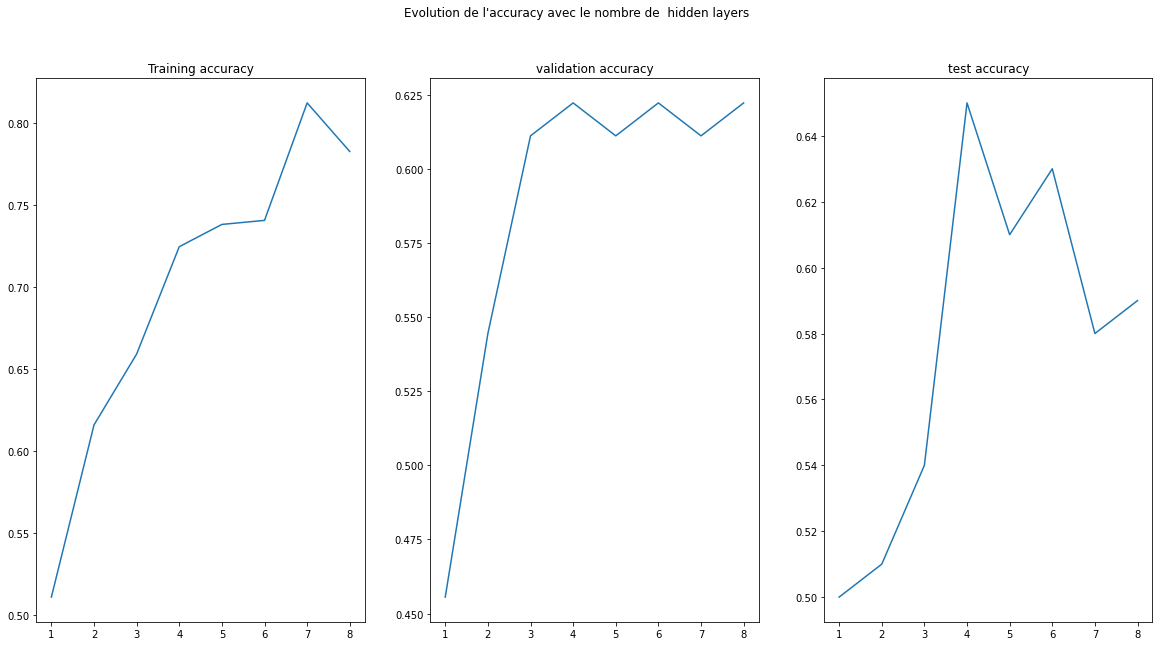

In [31]:
#fonction du plot
afficher(df_num_layers,"num_layers","Evolution de l'accuracy avec le nombre de  hidden layers")


# Nombre de cellules 

In [40]:
#units = [[int(i*2/3+10)] for i in range(784,1568,100)]
units = [[524,496,468],[468,440,412],[412,384,356],[356,328,300],[300,272,244],[244,216,188],[188,160,132],
         [132,104,72],[72,48,20]]
train_accuracy = []
val_accuracy = []
test_accuracy = []

for i in range(len(units)):
  checkpoint_filepath = 'tmp/checkpoint_units_'
  checkpoint_filepath += str(units[i][0])
  model = create_model(28,3,units[i],"relu",adam_optimizer)
  h = model.fit(
        dataset_train,
        epochs=60,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
  train_accuracy.append(max(h.history["accuracy"]))
  val_accuracy.append(max(h.history["val_accuracy"]))
  model.load_weights(checkpoint_filepath)
  res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
  test_accuracy.append(res_test["accuracy"])

df_num_units = pd.DataFrame({"num_units":[x[0] for x in units],
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_num_units)


2/2 [==============================] - 0s 9ms/step - loss: 1.0928 - accuracy: 0.5700
   num_units  training_acc   val_acc  test_acc
0        524      0.923457  0.688889      0.71
1        468      0.914815  0.666667      0.64
2        412      0.919753  0.688889      0.68
3        356      0.903704  0.677778      0.69
4        300      0.872840  0.688889      0.68
5        244      0.845679  0.666667      0.73
6        188      0.819753  0.700000      0.69
7        132      0.761728  0.655556      0.70
8         72      0.670370  0.588889      0.57


In [ ]:
afficher(df_num_units,"num_units","Evolution de l'accuracy avec le nombre de neurones")

On prend le nombre des units égal à **[244,216,188]** car c'est lui qui donne la meilleur valeur de l'accuracy de test.

# Type de la fonction d'activation

In [41]:
activation = ["relu","sigmoid","tanh"]
train_accuracy = []
val_accuracy = []
test_accuracy = []
for x in activation:
    checkpoint_filepath = 'tmp/checkpoint_activation_'
    checkpoint_filepath += x

    model = create_model(28,3,[244,216,188],x,adam_optimizer)
    h = model.fit(
        dataset_train,
        epochs=60,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_activation = pd.DataFrame({"activation": activation,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_activation)


2/2 [==============================] - 0s 9ms/step - loss: 1.0083 - accuracy: 0.6600
  activation  training_acc   val_acc  test_acc
0       relu      0.864198  0.688889      0.70
1    sigmoid      0.491358  0.444444      0.46
2       tanh      0.865432  0.700000      0.66


La fonction d'activation **ReLU** est la meilleur dans notre cas pour les hidden layers

#  Type de l'optimizer

In [45]:
optimizers = ['adam', 'adamax', 'rmsprop','sgd']

train_accuracy = []
val_accuracy = []
test_accuracy = []
for x in optimizers:
    checkpoint_filepath = 'tmp/checkpoint_optimizer_'
    checkpoint_filepath += str(x)
    
    model = create_model(28,3,[244,216,188],"relu",x)
    h = model.fit(
        dataset_train,
        epochs=100,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_optimizers = pd.DataFrame({"optimizers": optimizers,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_optimizers)

2/2 [==============================] - 0s 4ms/step - loss: 1.5844 - accuracy: 0.4100
  optimizers  training_acc   val_acc  test_acc
0       adam      0.825926  0.700000      0.70
1     adamax      0.725926  0.655556      0.66
2    rmsprop      0.822222  0.688889      0.70
3        sgd      0.417284  0.400000      0.41


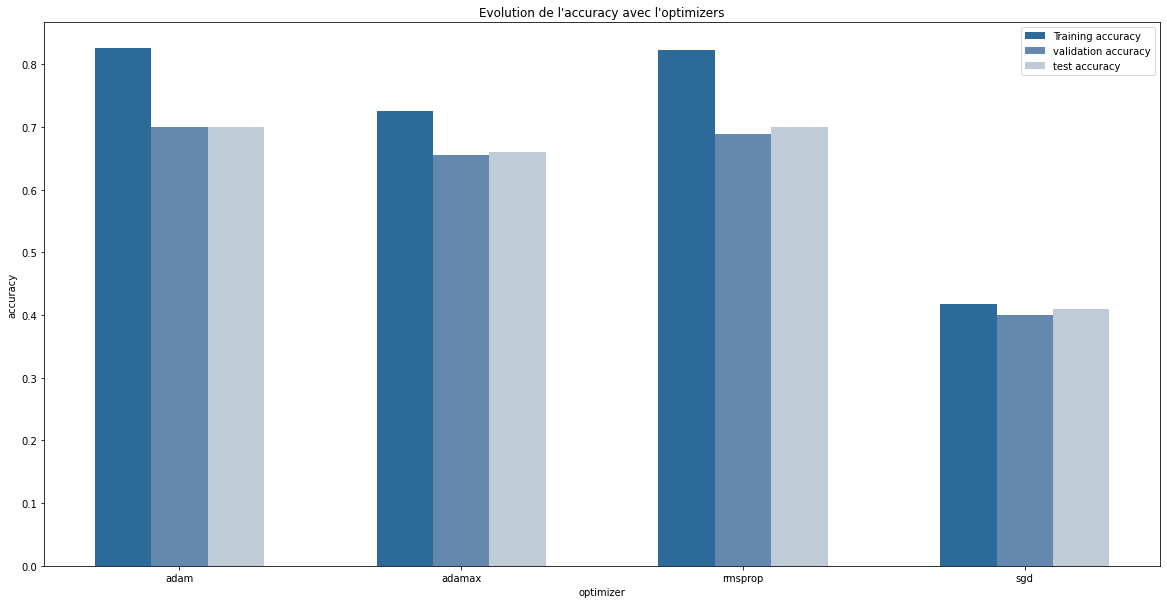

In [89]:
afficher_1(df_optimizers,"optimizers","Evolution de l'accuracy avec l'optimizers")

On utilisera ADAM comme optimizer vu que il donne des résultats supérieurs sur le train, validation et test

# Le choix du learning rate


In [47]:
learning_rates = [0.001,0.01,0.1,1]

train_accuracy = []
val_accuracy = []
test_accuracy = []
for x in learning_rates:
    checkpoint_filepath = 'tmp/checkpoint_optimizer_'
    checkpoint_filepath += str(x)

    optimizer = tf.keras.optimizers.Adam(learning_rate=x)
    
    model = create_model(28,3,[244,216,188],"relu",optimizer)
    h = model.fit(
        dataset_train,
        epochs=100,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_learning_rate = pd.DataFrame({"learning_rate": learning_rates,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_learning_rate)


2/2 [==============================] - 0s 6ms/step - loss: 315.8597 - accuracy: 0.1800
   learning_rate  training_acc   val_acc  test_acc
0          0.001      0.851852  0.700000      0.67
1          0.010      0.949383  0.644444      0.65
2          0.100      0.119753  0.144444      0.12
3          1.000      0.119753  0.222222      0.18


In [ ]:
afficher(df_learning_rate,"learning_rate","Evolution de l'accuracy avec le learning rate")

On choisit le "learning rate" le plus petit **0.001**

# Taille du batch

In [48]:
batch_sizes = [28,56,84,112,140,168,196,224]
train_accuracy = []
val_accuracy = []
test_accuracy = []
for x in batch_sizes:
    checkpoint_filepath = 'tmp/checkpoint_batch_'
    checkpoint_filepath += str(x)

    model = create_model(28,3,[244,216,188],"relu",tf.keras.optimizers.Adam(learning_rate=0.001))
    dataset_train = prepare_dataset(X_train,y_train,x)
    dataset_val = prepare_dataset(X_val,y_val,x)
    dataset_test = prepare_dataset(X_test,y_test,x)
    h = model.fit(
        dataset_train,
        epochs=100,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_batch = pd.DataFrame({"batch_size": batch_sizes,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_batch)


1/1 [==============================] - 0s 15ms/step - loss: 0.9500 - accuracy: 0.6600
   batch_size  training_acc   val_acc  test_acc
0          28      0.922222  0.700000      0.67
1          56      0.849383  0.700000      0.69
2          84      0.824691  0.666667      0.65
3         112      0.786420  0.711111      0.67
4         140      0.775309  0.677778      0.65
5         168      0.758025  0.655556      0.69
6         196      0.733333  0.633333      0.62
7         224      0.746914  0.655556      0.66


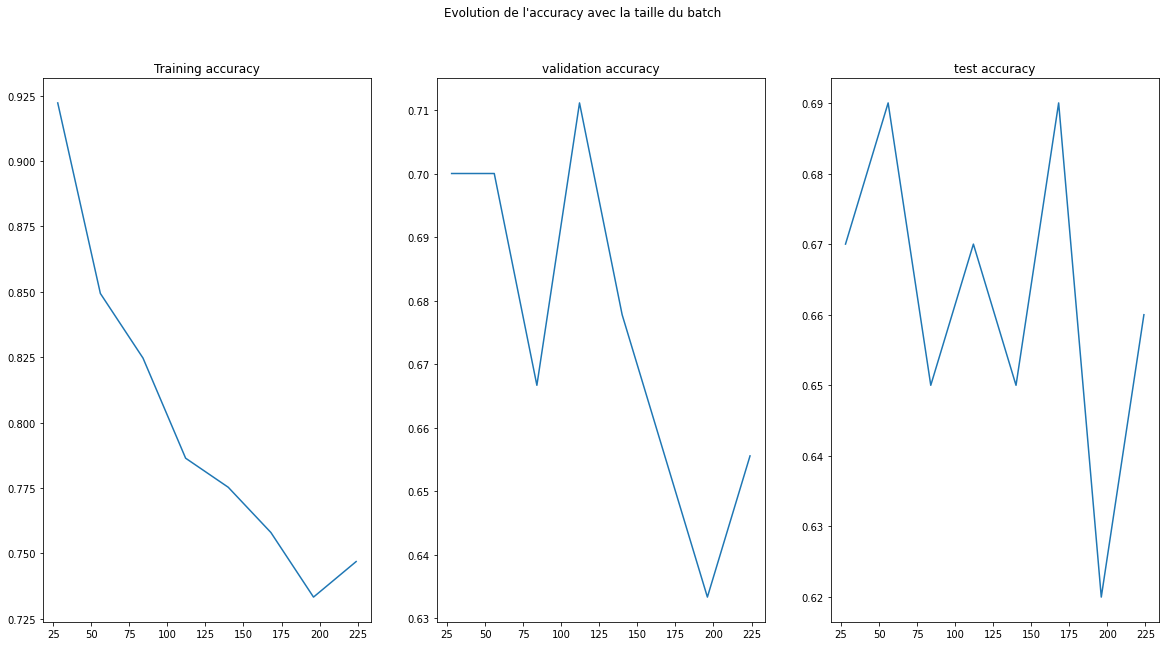

In [88]:
afficher(df_batch,"batch_size","Evolution de l'accuracy avec la taille du batch")

On choisit un batch size égal à **56**

In [50]:
epo = [50,100,150,200,250,300,350,400,450,500]

train_accuracy = []
val_accuracy = []
test_accuracy = []
for x in epo:
    checkpoint_filepath = 'tmp/checkpoint_epo_'
    checkpoint_filepath += str(x)
    
    model = create_model(28,3,[244,216,188],"relu",tf.keras.optimizers.Adam(learning_rate=0.001))
    h = model.fit(
        dataset_train,
        epochs=x,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )
    train_accuracy.append(max(h.history["accuracy"]))
    val_accuracy.append(max(h.history["val_accuracy"]))
    model.load_weights(checkpoint_filepath)
    res_test = model.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
    test_accuracy.append(res_test["accuracy"])

df_epoch = pd.DataFrame({"epochs": epo,
                             "training_acc": train_accuracy,
                             "val_acc": val_accuracy,
                             "test_acc":test_accuracy})

print(df_epoch)


1/1 [==============================] - 0s 15ms/step - loss: 0.9496 - accuracy: 0.7100
   epochs  training_acc   val_acc  test_acc
0      50      0.665432  0.577778      0.56
1     100      0.776543  0.666667      0.66
2     150      0.820988  0.700000      0.72
3     200      0.855556  0.700000      0.67
4     250      0.900000  0.700000      0.69
5     300      0.927161  0.722222      0.73
6     350      0.969136  0.700000      0.71
7     400      0.981481  0.688889      0.66
8     450      0.988889  0.711111      0.69
9     500      0.979012  0.700000      0.71


# Modèle final 

Le modèle final optimal a les caractéristiques suivantes :

- Nombre de "hidden layers" : **3**

- Nombre de cellule dans la couches cachée : **[244,216,188**

- Type de la fonction d'activation des couches cachées : **ReLu**

- Learning rate de l'ADAM optimizer : **0.001**

- taille du batch : **56**

- Nombre du epoch : **300**

### Performances de ce modèle (train / validation et test accuracy)

In [55]:
checkpoint_filepath = 'tmp/checkpoint_final_model'

model_f = create_model(28,3,[244,216,188],"relu",tf.keras.optimizers.Adam(learning_rate=0.001))
dataset_train = prepare_dataset(X_train,y_train,56)
dataset_val = prepare_dataset(X_val,y_val,56)
dataset_test = prepare_dataset(X_test,y_test,56)
h = model_f.fit(
        dataset_train,
        epochs=300,
        validation_data=dataset_val,
        verbose=0,
        callbacks=[sauvegarde(checkpoint_filepath)] 
    )

model_f.load_weights(checkpoint_filepath)
res_test = model_f.evaluate(dataset_test, verbose=1, use_multiprocessing=True, return_dict=True)
res_train = model_f.evaluate(dataset_train, verbose=0, use_multiprocessing=True, return_dict=True)
res_val = model_f.evaluate(dataset_val, verbose=0, use_multiprocessing=True, return_dict=True)

print("Les résultat sur la data d'entrainement sont : ",res_train)
print("Les résultat sur la data de validation sont : ",res_val)
print("Les résultat sur la data de test sont : ",res_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.9824 - accuracy: 0.7100
Les résultat sur la data d'entrainement sont :  {'loss': 0.532246470451355, 'accuracy': 0.8061728477478027}
Les résultat sur la data de validation sont :  {'loss': 1.1689393520355225, 'accuracy': 0.6888889074325562}
Les résultat sur la data de test sont :  {'loss': 0.9824145436286926, 'accuracy': 0.7099999785423279}


Conclusion: 70% de l'accuarcy sur les donnees du test

**Prediction**

In [77]:
X_test.reset_index(drop=True, inplace=True)
X_test

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.292824,0.282828,0.479320,0.377125,0.489379,0.537839,0.538643,0.455842,0.784470,0.457623,0.475795,0.731900,0.537839,0.652020,0.526677,0.621665,0.237953,0.622330,0.132876,0.654015,0.286196,0.538927,0.121009,0.619945,0.330598,0.563974,0.432337,0.732405
1,0.207341,0.272727,0.568016,0.474726,0.664927,0.747438,0.704716,0.493964,0.770108,0.273620,0.732959,0.479370,0.582263,0.436882,0.567509,0.396379,0.796346,0.361304,0.586576,0.527692,0.778919,0.410119,0.594019,0.523338,0.456565,0.397420,0.553604,0.486496
2,0.651852,0.666667,0.180363,0.136416,0.199337,0.245422,0.223646,0.197579,0.527660,0.777455,0.416403,0.472832,0.541551,0.332845,0.562174,0.278570,0.540804,0.219201,0.489991,0.403904,0.740470,0.431741,0.589034,0.596620,0.622609,0.491469,0.502327,0.387789
3,0.412500,0.454545,0.569598,0.347538,0.500477,0.491060,0.545970,0.576322,0.790457,0.491589,0.428337,0.949365,0.161920,0.869602,0.231061,0.676749,0.320796,0.595420,0.322247,0.616459,0.469188,0.678863,0.240742,0.419428,0.418008,0.342894,0.305517,0.367009
4,0.292824,0.353535,0.355639,0.153357,0.533771,0.632742,0.575432,0.437455,0.666313,0.396347,0.500737,0.353014,0.635626,0.468048,0.525923,0.286506,0.501846,0.079557,0.526816,0.349918,0.564061,0.233727,0.430001,0.295288,0.464421,0.488493,0.497017,0.430735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.246795,0.292929,0.735767,0.672939,0.581070,0.631865,0.649564,0.435213,0.926518,0.384993,0.504932,0.749732,0.525614,0.848474,0.449175,0.780249,0.431919,0.837449,0.418132,0.766200,0.442120,0.570986,0.365252,0.760356,0.375387,0.519412,0.466880,0.621018
96,0.268889,0.313131,0.790694,0.535813,0.421759,0.531294,0.509848,0.302708,0.769239,0.491885,0.596217,0.686765,0.458789,0.837344,0.462540,0.620724,0.448860,0.734599,0.501433,0.684323,0.593053,0.647133,0.471414,0.669949,0.487440,0.503434,0.560131,0.678085
97,0.292824,0.353535,0.518673,0.371519,0.470384,0.494946,0.526058,0.418783,0.747711,0.428887,0.404214,0.604298,0.431882,0.812113,0.439413,0.689266,0.460509,0.762851,0.514622,0.598092,0.571256,0.555460,0.449581,0.643284,0.589918,0.620232,0.569603,0.673297
98,0.226337,0.262626,0.542317,0.216975,0.546896,0.470582,0.532808,0.614756,0.742688,0.435153,0.304727,0.757612,0.446673,0.657506,0.356819,0.623932,0.314039,0.767198,0.218641,0.739539,0.254010,0.517614,0.333503,0.739159,0.323442,0.686981,0.386886,0.602798


In [87]:
a = int(input('Entrez le numero de ligne(entre 0 a 99) du data test(X_test) pour faire la prediction'))
print("\n")
if a:
    pred=model_f.predict(X_test)
    print("le genre de cette musique est: ",uniques[np.argmax(pred[a])])
else:
    print("Erreur!")

Entrez le numero de ligne(entre 0 a 99) du data test(X_test) pour faire la prediction10


le genre de cette musique est:  country


# FIN